In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v4.csv", delimiter=";")
dataset.head()

,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,ram,available_ram,bw,available_bw,power_model,vms,Unnamed: 15
0,300.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
1,600.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
2,900.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
3,1200.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN
4,1500.01,Datacenter_1,0,host,True,4,1,10000,0.0,160000,83880.0,10000,111.0,"93.7,97.0,101.0,105.0,110.0,116.0,121.0,125.0,...","2,1000.0,8388.0,12.0:2,1000.0,8388.0,12.0:2,10...",NaN


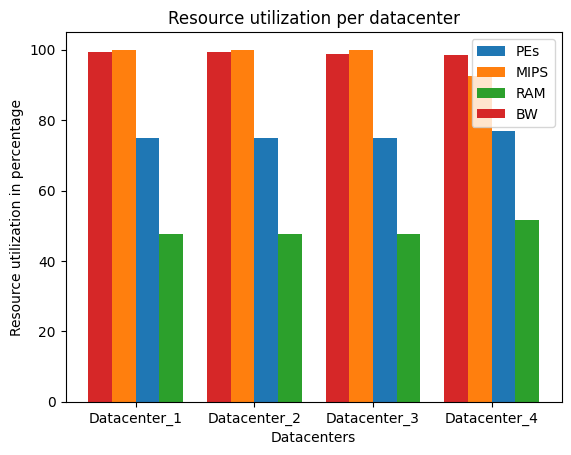

In [2]:
labels = np.unique(dataset['datacenter_name'])
datacenter_totalPEs = np.array([])
datacenter_availablePEs = np.array([])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])
for i in range(len(labels)):
    totalPEs = 0
    availablePEs = 0
    totalMIPS = 0
    availableMIPS = 0
    totalRAM = 0
    availableRAM = 0
    totalBW = 0
    availableBW = 0
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        totalPEs += sample['number_of_pes']
        availablePEs += sample['available_pes']
        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
    
    datacenter_totalPEs = np.append(datacenter_totalPEs, totalPEs)
    datacenter_availablePEs = np.append(datacenter_availablePEs, availablePEs)
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)

x = np.arange(len(labels))
datacenter_usedPEs = np.subtract(datacenter_totalPEs, datacenter_availablePEs)
datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)

bar_width = 0.2
plt.bar(x + bar_width/2, np.divide(datacenter_usedPEs, datacenter_totalPEs)*100, bar_width, label="PEs")
plt.bar(x - bar_width/2, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width, label="MIPS")
plt.bar(x + bar_width+bar_width/2, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width, label="RAM")
plt.bar(x - bar_width-bar_width/2, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width, label="BW")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter")
plt.legend()
plt.show()

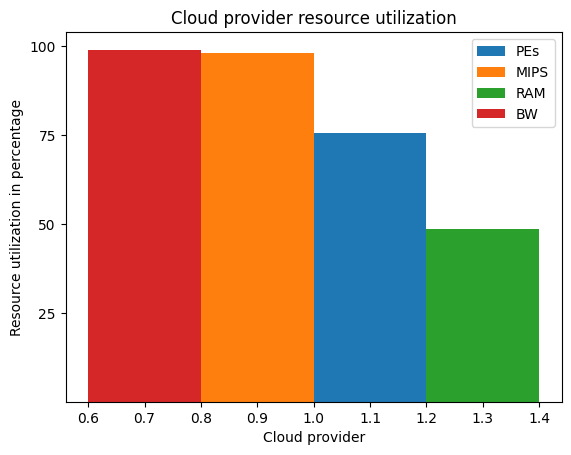

In [3]:
bar_width = 0.2
plt.bar(1 + bar_width/2, np.mean(datacenter_usedPEs)/np.mean(datacenter_totalPEs)*100, bar_width, label="PEs")
plt.bar(1 - bar_width/2, np.mean(datacenter_usedMIPS)/np.mean(datacenter_totalMIPS)*100, bar_width, label="MIPS")
plt.bar(1 + bar_width+bar_width/2, np.mean(datacenter_usedRAM)/np.mean(datacenter_totalRAM)*100, bar_width, label="RAM")
plt.bar(1 - bar_width-bar_width/2, np.mean(datacenter_usedBW)/np.mean(datacenter_totalBW)*100, bar_width, label="BW")


plt.xlabel("Cloud provider")
plt.ylabel("Resource utilization in percentage")
plt.yticks([25,50,75,100])
plt.title("Cloud provider resource utilization")
plt.legend()
plt.show()

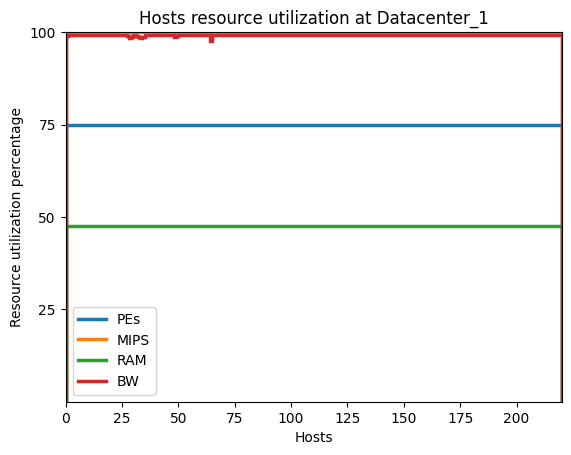

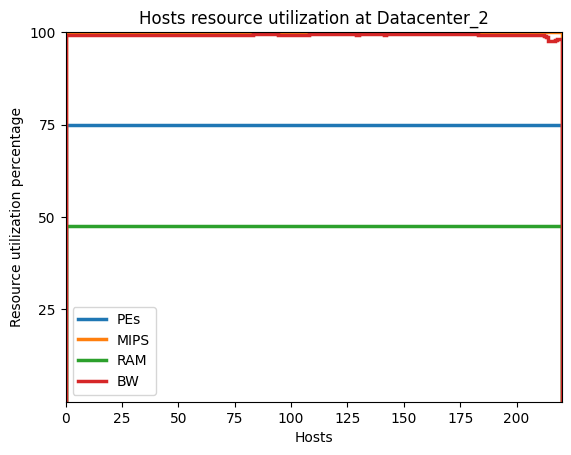

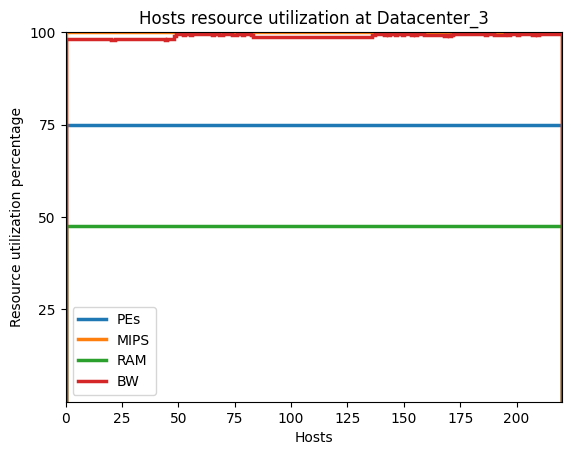

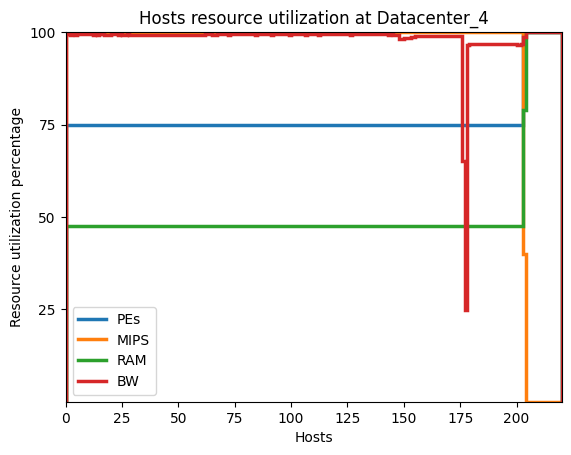

In [4]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    host_PEs = np.array([])
    host_availablePEs = np.array([])
    host_MIPS = np.array([])
    host_availableMIPS = np.array([])
    host_RAM = np.array([])
    host_availableRAM = np.array([])
    host_BW = np.array([])
    host_availableBW = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        host_PEs = np.append(host_PEs, sample['number_of_pes'])
        host_availablePEs = np.append(host_availablePEs, sample['available_pes'])
        
        host_MIPS = np.append(host_MIPS, sample['mips'])
        host_availableMIPS = np.append(host_availableMIPS, sample['available_mips'])
        
        host_RAM = np.append(host_RAM, sample['ram'])
        host_availableRAM = np.append(host_availableRAM, sample['available_ram'])
        
        host_BW = np.append(host_BW, sample['bw'])
        host_availableBW = np.append(host_availableBW, sample['available_bw'])
        
    fig, ax = plt.subplots()
    ax.stairs(np.divide(np.subtract(host_PEs, host_availablePEs), host_PEs)*100, linewidth=2.5, label="PEs")
    ax.stairs(np.divide(np.subtract(host_MIPS, host_availableMIPS), host_MIPS)*100, linewidth=2.5, label="MIPS")
    ax.stairs(np.divide(np.subtract(host_RAM, host_availableRAM), host_RAM)*100, linewidth=2.5, label="RAM")
    ax.stairs(np.divide(np.subtract(host_BW, host_availableBW), host_BW)*100, linewidth=2.5, label="BW")
    ax.set(xlim=(0, len(host_availablePEs)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Hosts")
    plt.title(f"Hosts resource utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()